In [41]:
import pandas as pd
import matplotlib.pyplot as plt

### 1º Duration and Convexity

In [12]:
# Carregar os dados mockados
ativos = pd.read_csv('../dataset/ativos.csv')

In [14]:
# Função para calcular o valor presente de fluxos de caixa
def calcular_valor_presente(fluxos, taxa):
    return sum(cf / ((1 + taxa) ** (t + 1)) for t, cf in enumerate(fluxos))

In [26]:
# Função para calcular Duration
def calcular_duration(fluxos, taxa):
    vp_total = sum(cf / ((1 + taxa) ** (t + 1)) for t, cf in enumerate(fluxos))
    duration = sum((t + 1) * (cf / ((1 + taxa) ** (t + 1))) for t, cf in enumerate(fluxos)) / vp_total
    return duration

In [27]:
# Função para calcular Convexity
def calcular_convexity(fluxos, taxa):
    vp_total = sum(cf / ((1 + taxa) ** (t + 1)) for t, cf in enumerate(fluxos))
    convexity = sum(
        (cf * (t + 1) * (t + 2)) / ((1 + taxa) ** (t + 3)) for t, cf in enumerate(fluxos)
    ) / vp_total
    return convexity

In [28]:
# Função para gerar fluxos de caixa
def gerar_fluxos_juros(periodos, valor_inicial, taxa_anual):
    return [round(valor_inicial * ((1 + taxa_anual)**t), 2)for t in range(1, periodos + 1)]

In [29]:
def gerar_fluxos_descont(periodos, valor_mensal, taxa_desconto):
    return [round(valor_mensal / ((1 + taxa_desconto)**t), 2) for t in range(1, periodos + 1)]

In [33]:
# Iterar sobre os ativos para calcular Duration e Convexity
resultado_ativo = []
for _, ativos_it in ativos.iterrows():
    fluxos = gerar_fluxos_juros(ativos_it['Datas dos Fluxos (T)'], ativos_it['Valor de Mercado (R$)'], ativos_it['Taxa de Juros Atual (%)']) 
    taxa = ativos_it['Taxa de Juros Atual (%)']
    
    duration = calcular_duration(fluxos, taxa)
    convexity = calcular_convexity(fluxos, taxa)
    
    resultado_ativo.append({
        'Ativo': ativos_it['Ativo'],
        'Duration': duration,
        'Convexity': convexity,
        'Fluxo': fluxos
    })

In [36]:
# Criar um DataFrame com os resultados
df_resultados = pd.DataFrame(resultado_ativo)

In [37]:
print("Resultados de Duration e Convexity:")
print(df_resultados)

Resultados de Duration e Convexity:
       Ativo  Duration  Convexity
0       Vale       3.0   9.700257
1  Petrobras       2.5   4.759408
2       Ouro       3.5  14.296620
3     Dollar       1.5   3.346360
4    S&P 500       3.0  10.251951


In [39]:
# Dados
ativos = df_resultados['Ativo']
duration = df_resultados['Duration']
convexity = df_resultados['Convexity']
fluxo = df_resultados['Fluxo']

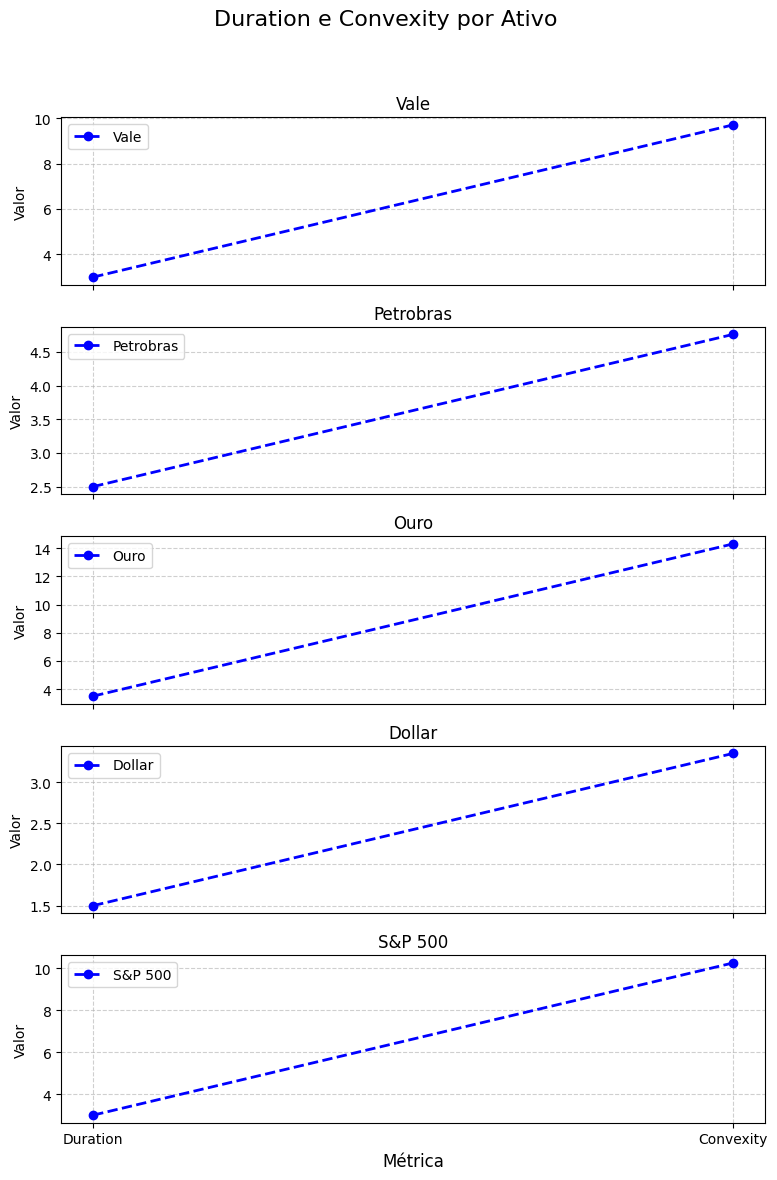

In [44]:
# Configuração do layout dos gráficos
fig, axs = plt.subplots(len(df_resultados), 1, figsize=(8, 12), sharex=True)
fig.suptitle('Duration e Convexity por Ativo', fontsize=16)

# Plotar para cada ativo
for i, (index, row) in enumerate(df_resultados.iterrows()):
    ativo = row['Ativo']
    duration = row['Duration']
    convexity = row['Convexity']
    fluxo = df_resultados['Fluxo']
    
    # Criação das séries (eixos x fixos: Duration e Convexity como índices 0 e 1)
    x = ['Duration', 'Convexity']
    y = [duration, convexity]
    
    # Gráfico individual
    axs[i].plot(x, y, marker='o', label=f'{ativo}', color='blue', linestyle='--', linewidth=2)
    axs[i].set_title(ativo, fontsize=12)
    axs[i].set_ylabel('Valor', fontsize=10)
    axs[i].legend(loc='upper left')
    axs[i].grid(True, linestyle='--', alpha=0.6)

# Configurações finais
plt.xlabel('Métrica', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta para evitar sobreposição
plt.show()